In [4]:
#Banks employ the skills of Data analysts to derive insights on customers behaviors and improve on their relationship,improve service delivery and marketing.
#Banks use data findings to influence and make data-driven decisions,good decision making is critical and the backbone of any organisation.
#Banks by the use of relevant data helps to save money,by analysing past perfomance can ascertain areas less efecetive such as marketing and focus on productive ones.

In [5]:
#libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [6]:
#import the dataset that i will use for analysis:
df=pd.read_csv('Bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
#columns in our dataset:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
#lets see simple statics of our data set:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [46]:
#to check for any null values.
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [50]:
#the number of people who are married and have a loan.
df[df.marital=='married'][df.loan=='yes']

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_7392\4141951969.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.marital=='married'][df.loan=='yes']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
12,29,management,married,tertiary,no,199,yes,yes,unknown,7,may,1689,4,-1,0,unknown,yes
40,60,blue-collar,married,primary,no,1262,yes,yes,unknown,13,may,1015,1,-1,0,unknown,yes
52,59,retired,married,secondary,no,1521,yes,yes,unknown,14,may,1125,2,-1,0,unknown,yes
66,49,unknown,married,primary,no,341,yes,yes,unknown,15,may,520,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11132,32,blue-collar,married,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11146,30,admin.,married,secondary,yes,23,no,yes,cellular,4,feb,149,2,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no


<Axes: xlabel='job'>

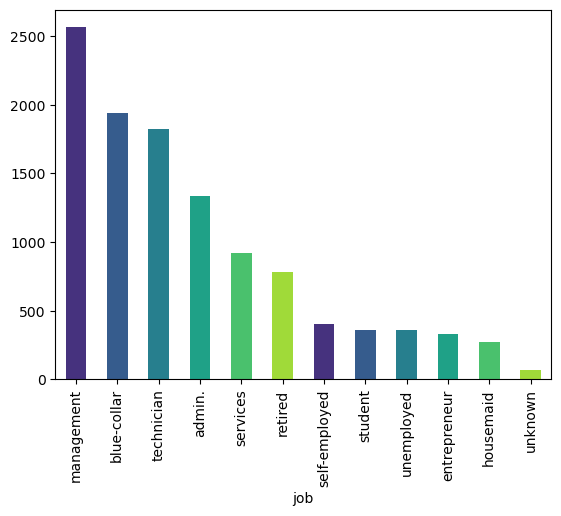

In [24]:
#number of customer in various fields:
df['job'].value_counts().plot(kind='bar',color=sns.color_palette('viridis'))

<Axes: xlabel='marital', ylabel='count'>

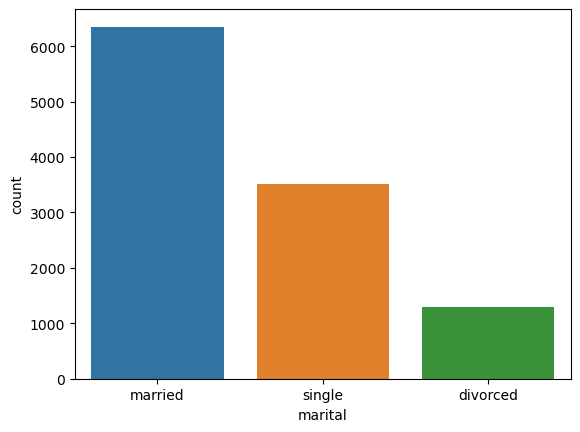

In [27]:
#number of customer based on their marital status:
sns.countplot(x='marital',data=df)

In [42]:
#clients with loans:
those_with=df[df.loan=='yes']['marital'].count()

those_with

1460

In [43]:
#clients without loans:
those_without=df[df.loan=='no']['marital'].count()

those_without

9702

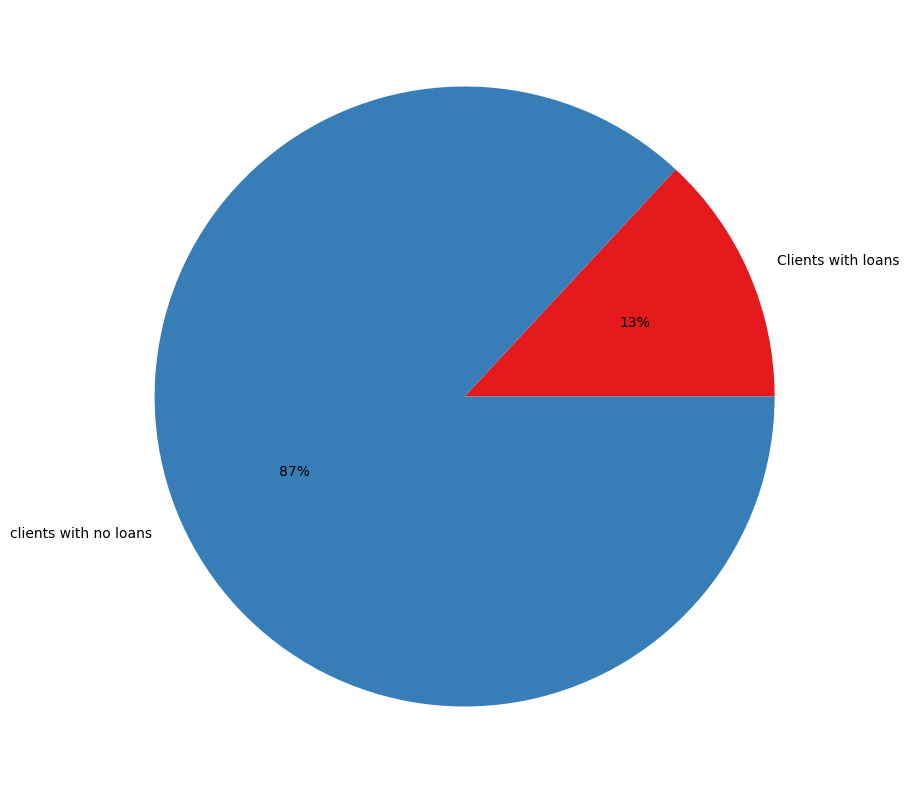

In [45]:
#piechart to show clients with loans and the ones without:
plt.figure(figsize=(10,16))
data=[those_with,those_without]
labels=['Clients with loans','clients with no loans']
color=sns.color_palette('Set1')
plt.pie(data,labels=labels,colors=color,autopct='%.0f%%')
plt.show()


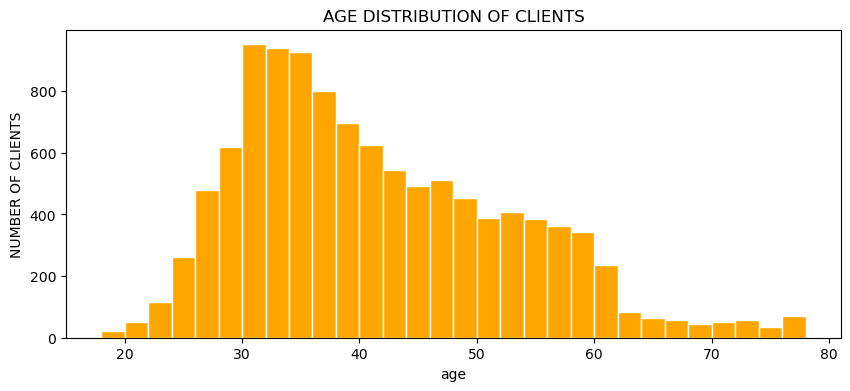

In [61]:
#a histogram to see the age distribution of the clients:
plt.figure(figsize=(10,4))
plt.title('AGE DISTRIBUTION OF CLIENTS')
plt.xlabel('age')
plt.ylabel('NUMBER OF CLIENTS')
plt.hist(df.age,bins=np.arange(18,80,2),color='orange',edgecolor='white');

C:\Users\SOLOMON\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


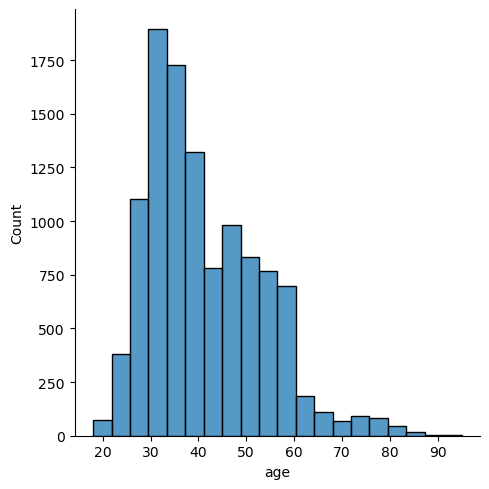

In [63]:
#distribution of age:
sns.displot(df, x="age", bins=20)
plt.show()

<Axes: xlabel='marital', ylabel='count'>

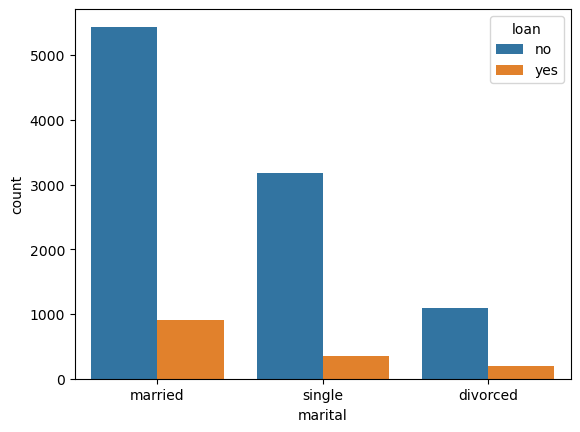

In [57]:
#clients who are married and have a personal loan:
sns.countplot(x='marital',hue='loan',data=df)

<Axes: xlabel='housing', ylabel='count'>

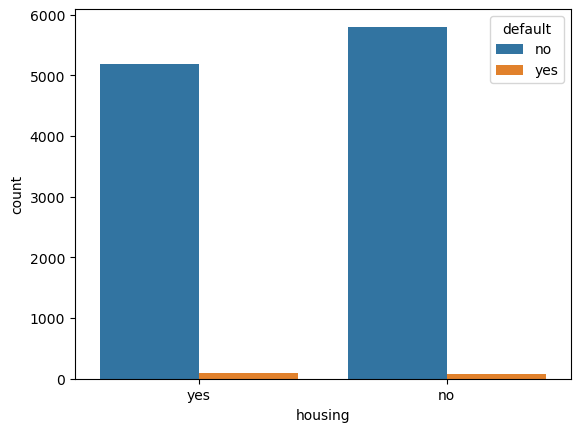

In [59]:
#loan defaulters based on housing loan:
sns.countplot(x='housing',hue='default',data=df)

<Axes: xlabel='month', ylabel='count'>

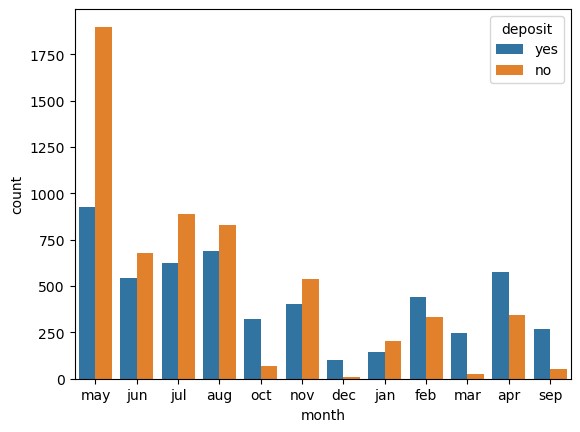

In [60]:
#months that are likely for customers to make deposits.
sns.countplot(x='month',hue='deposit',data=df)

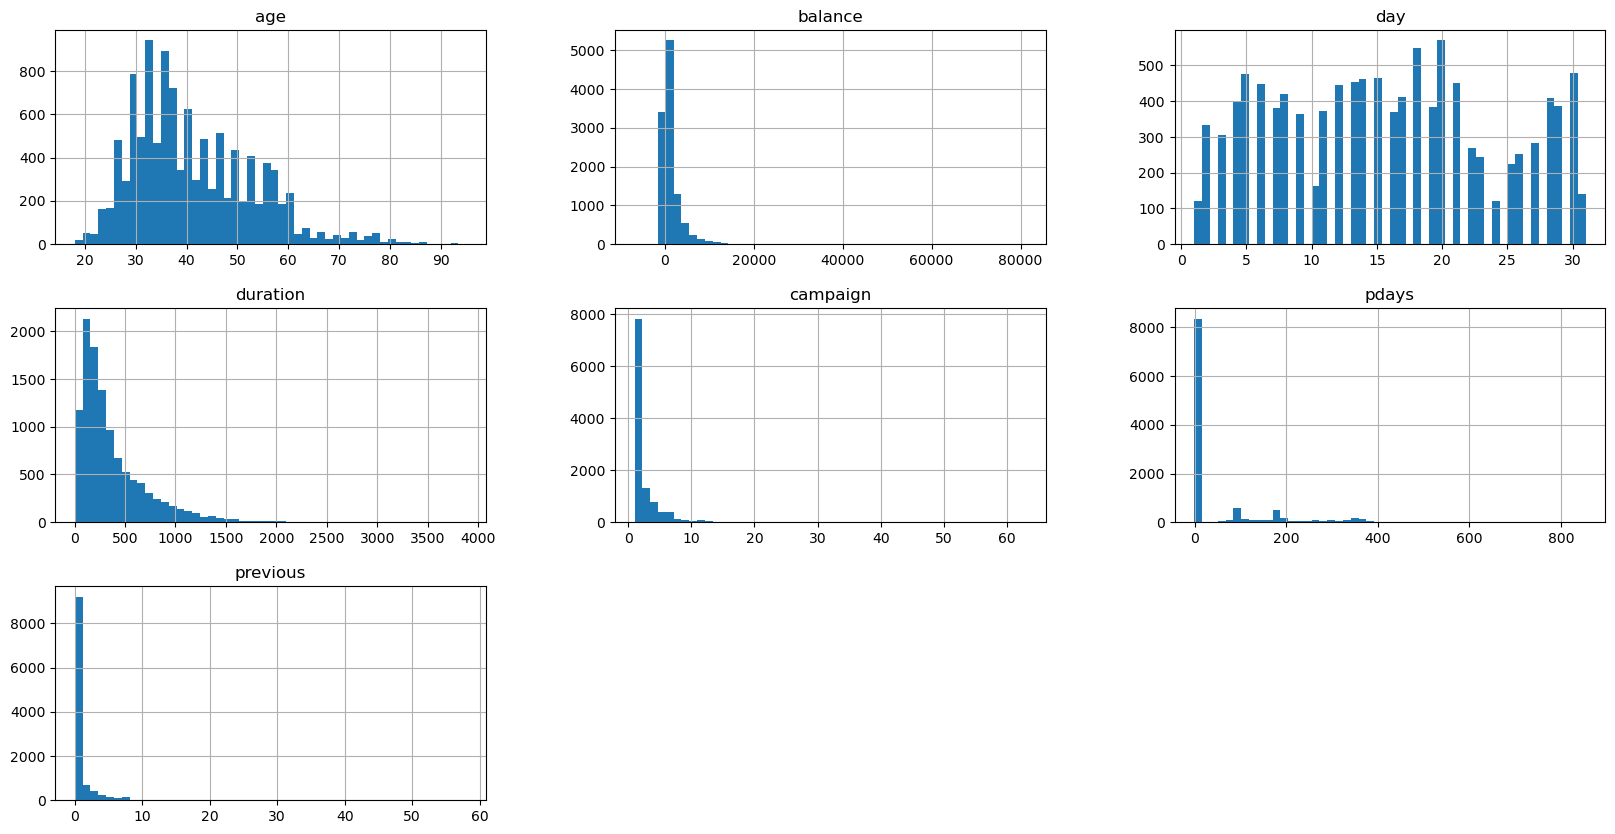

In [64]:
#check the distribution of the numerical columns.
df.hist(bins=50, figsize=(20,10))
plt.show()